# Streaming data visualisation - climate data

<IPython.core.display.Javascript object>


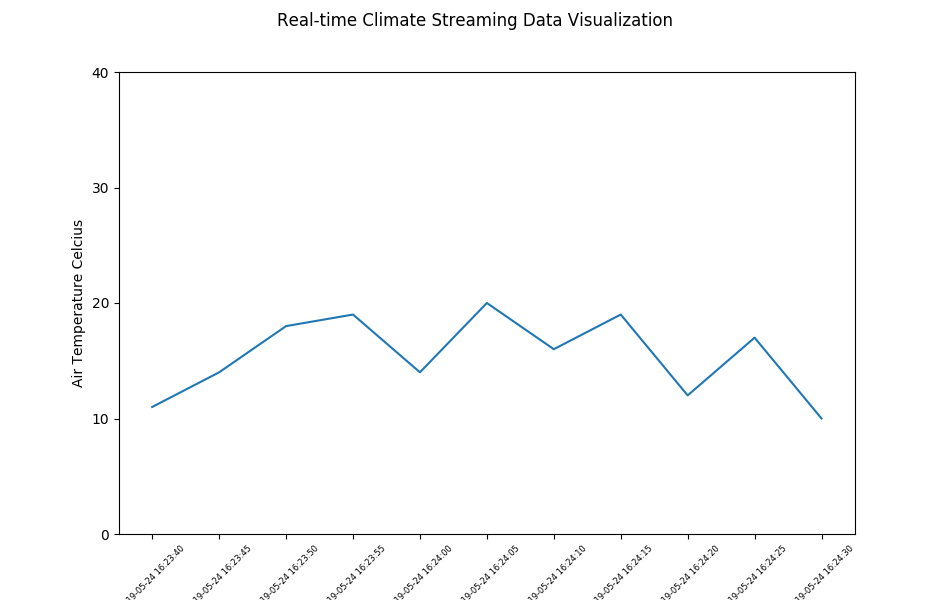

KeyboardInterrupt: 

In [1]:
# import libraries
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import json
import matplotlib.pyplot as plt
%matplotlib notebook

topic = 'climate'

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=10000, 
                                   bootstrap_servers=['localhost:9092'],
                                   api_version=(0, 10),
                                   value_deserializer=lambda x: json.loads(x.decode('utf-8')))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Real-time Climate Streaming Data Visualization') # giving figure a title
        ax.set_xlabel('Time')
        ax.set_ylabel('Air Temperature Celcius')
        ax.set_ylim(0,40) # upper limite set to 40 as the max temperature is 32  
        ax.set_yticks([0,10,20,30,40]) # change the ticks accordingly
        ax.tick_params(rotation = 45, axis = 'x', labelsize = 6)
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))
    
def consume_messages(consumer, fig, ax):
    try:
        # store data for x-axis and y-axis
        x, y = [], []
        for message in consumer:
            data = message.value
            x.append(data['created_time'])  
            y.append(int(data['air_temperature_celcius'])) 
    
            # we start plotting only when we have 10 data points
            if len(y) > 10:
                ax.clear()
                ax.plot(x, y)
                ax.set_xlabel('Time', ) 
                ax.set_ylabel('Air Temperature Celcius', )
                ax.set_ylim(0,40) # upper limite set to 40 as the max temperature is 32  
                ax.set_yticks([0,10,20,30,40]) # change the ticks accordingly  
                fig.canvas.draw()
                x.pop(0) # removing the item in the first position
                y.pop(0) # removing the item in the first position
    
        plt.close('all')
                                   
    except Exception as ex:
        print(str(ex))
    

if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()
    consume_messages(consumer, fig, ax)
    
    